In [50]:
%reset

In [51]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
from scipy.interpolate import griddata
import matplotlib.ticker as ticker
import scipy

#Shell environment
import os
import sys
import subprocess		# to send python variables to shell.

# Permutations
import itertools

In [59]:
def distance(_x):
    return np.sqrt(np.dot(_x,_x))

# Change here.
def wavefunction(_xp):
#     He atom.
    r1 = distance(_xp[0])
    r2 = distance(_xp[1])
    r12 = distance(_xp[0] - _xp[1])
    return np.exp( -2.0*(r1 + para[0]*r1*r1)/(1+r1) - 2.0*(r2+para[0]*r2*r2)/(1+r2) + 0.5*r12/(1+para[1]*r12) )
#     return np.exp( -para[0]*(r1 + r2) ) #Choice 2
    # SHO
#     _sum = 0.0
#     for iP in range(len(_xp)):
#         _r = distance( _xp[iP] )
#         _sum = _sum + np.exp( -para[0]* _r**2 )
#     return _sum

#Change here.
def potential(_xp):
#     He atom                        
    r1 = distance(_xp[0])
    r2 = distance(_xp[1])
    r12 = distance(_xp[0] - _xp[1])
    return -2.0/r1 - 2.0/r2 + 1.0/r12
    #SHO
#     _sum = 0.0
#     for iP in range(len(_xp)):
#         _r = distance( _xp[iP] )
#         _sum = _sum + 0.5*_r**2
#     return _sum
    
def d2FdX(_xp):
    _dx = 0.0000001
    _sum = 0.0
    for iP in range(len(_xp)):
        for iD in range(len(_xp[0])):
            _xplus = np.copy(_xp)
            _xplus[iP][iD] = _xplus[iP][iD] + _dx
            _xminus = np.copy(_xp)
            _xminus[iP][iD] = _xminus[iP][iD] - _dx
            _sum = _sum +  ( wavefunction(_xplus) + wavefunction(_xminus) - 2*wavefunction(_xp) )/(_dx*_dx)
    return _sum

def localE(_xp):
    Vchi = potential(_xp) * wavefunction(_xp) # V(x) chi(x)
    Tchi = - 0.5*d2FdX(_xp) # T chi(x)
    return (Tchi + Vchi)*1.0/wavefunction(_xp) # (1/chi)*H*chi

# ### Metropilis-Hasting symmetric sampling.
def vmcEnergy(_nVMC):
    _Etotal = 0.0    
    _xsample = np.array( [ np.random.uniform(-1,1,nD) for i in range(nP)]) # Initial random starting point.
    for _ix in range(0, _nVMC):
        ########## MH sampling
        _xproposed = np.copy(_xsample)
        iP = np.random.randint(0, len(_xsample), 1) # Select a particle.
        _xproposed[iP] = _xsample[iP] + np.array( np.random.normal(0.0,1.0,len(_xsample[0]) ) )   # Generate new position around the old position using Gaussian.
        if np.random.uniform(0,1) <= (wavefunction(_xproposed)/wavefunction(_xsample))**2: # Accept/reject the new postition
            _xsample = np.copy(_xproposed)
        ###########
        # Local energy calculation
        _Etotal = _Etotal + localE(_xsample)
    return _Etotal/_nVMC

#### GD for minimization
def minimization_GD(_para ):
    print( _para)
    _learning_rate = 0.2
    _fd  = 0.1*np.ones( len(_para) )
    # GD loop
    for igd in range(3):
        global para
        _dx = np.array( 0.1 )
        _para = np.copy(para)
        # Derivative for each para.
        for ipara in range(len(_para)):
#             global nVMC
            para[ipara] = _para[ipara] + _dx
            _fplus = vmcEnergy(nVMC)
            para[ipara] = _para[ipara] - _dx
            _fminus =  vmcEnergy(nVMC)
            # Derivative
            _fd[ipara] = 0.5*( _fplus - _fminus )/_dx
        ###
        para = para - _learning_rate * _fd # GD update algorithm
        print(igd, para)
        return np.array( [igd, para[0], para[1], vmcEnergy(nVMC)])

# Initiate variables
nP = 2 # Number of particles
nD = 3 # Number of dimension
para =0.1*np.ones(2) # Number of parameters
nVMC = 100000
###

print( vmcEnergy(nVMC) )

## Looks like GD does not work well because derivative is not well behaved because of randomness.
# list_para = minimization_GD(para) 
# print(list_para)

# x0 = np.array( [ 0.0*np.random.uniform(-1,1,nD) for i in range(nP)])
# print("Here", x0, distance(x0[0]), d2FdX(x0), localE(x0))

## covergence test
# goodN = 2000
# dgoodN = 25000
# for iN in range(1):
#     print(goodN+iN*dgoodN, vmcEnergy(goodN+iN*dgoodN))
### 

## Parameter scan range
# for i in range(len(para)):
#     for j in range(10):
#         para[i] = para[i] -0.19
#         print(para[0],para[1], vmcEnergy(10000))

# result = np.array([]).reshape(0,len(para) + 1) # [para, E]
# dpara=0.5
# for ipara in range(len(para)):
#     while para[ipara] <4.0:
#         para[ipara] =para[ipara] + dpara
#         e = vmcEnergy(500)
# #         e = vmcEnergy(500000)
#         print(para[0],para[1], e)
#         result = np.vstack( (result, np.array( [para[0], para[1], e ] ) ) )
    


-0.6620836777556255
[0.1 0.1]


/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in double_scalars
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in double_scalars
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


0 [1.20886866        nan]
[0.         1.20886866        nan        nan]


In [ ]:
_xsample

No handles with labels found to put in legend.


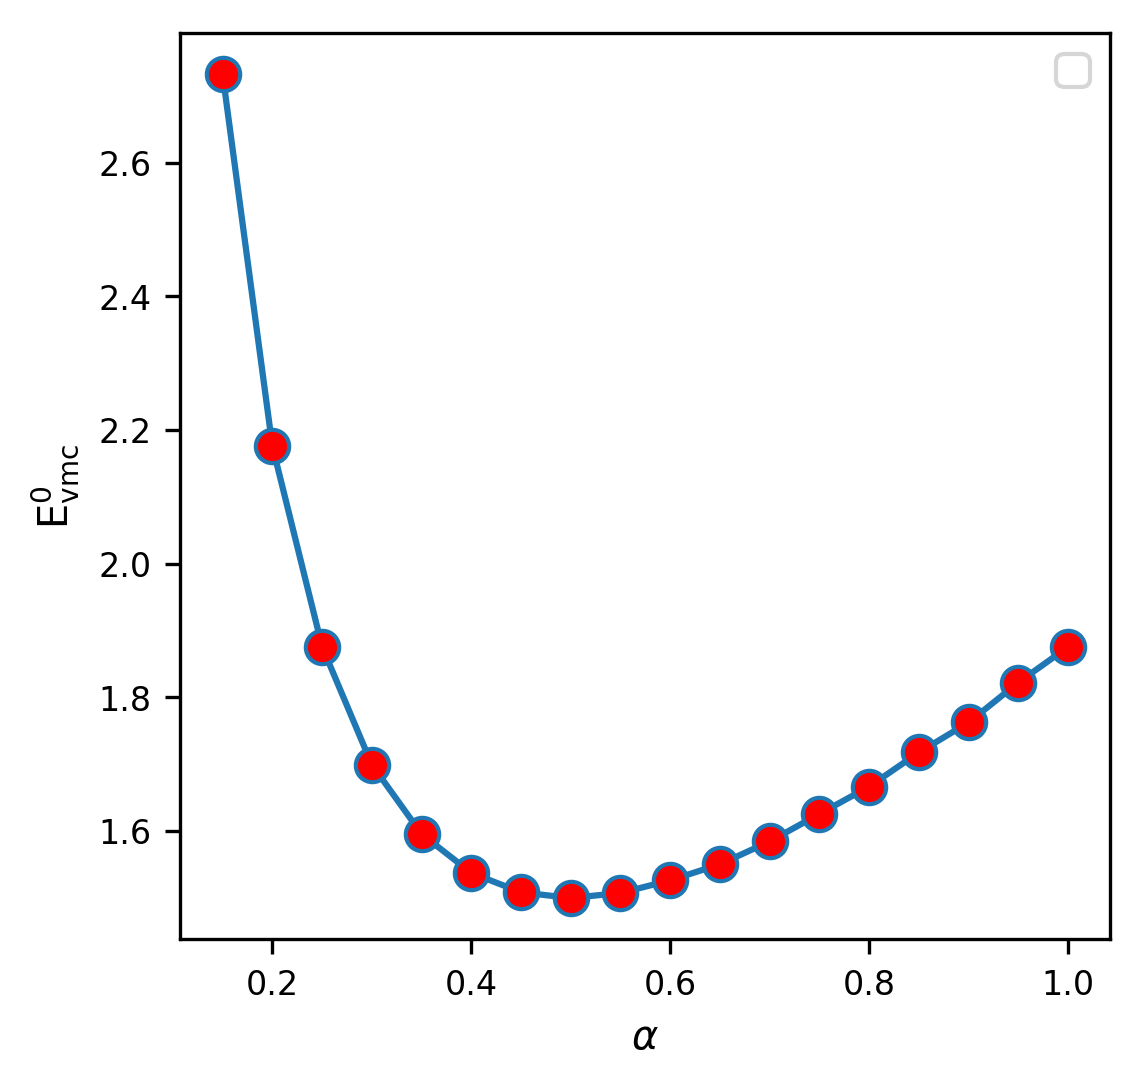

In [21]:
# Plots for MH
### Plot
fig, ax = plt.subplots(1,1, figsize=(4,4), dpi=300)
marksize = 8
fontl = 8

ax.plot(result[:,0],result[:,2], '-o', markerfacecolor='r', markersize = marksize )

# ax.set_ylim(0,10)
ax.set_xlabel(r'$\alpha$', fontsize = 1.2*fontl)
ax.set_ylabel(r'$\mathrm{E^0_{vmc}}$', fontsize = 1.2*fontl)
ax.legend( loc='upper right', frameon = 'True')
ax.tick_params(axis='both', which='major', labelsize=1.0*fontl) 
#ax.tick_params(axis='y', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off', labelsize=0.4*fontl) 

# fig.savefig('test.eps', bbox_inches='tight')
fig.savefig('test.pdf', bbox_inches='tight')
# fig.savefig('test.jpg', bbox_inches='tight')

plt.show()